<a href="https://colab.research.google.com/github/aniketsharma00411/sign-language-to-text-translator/blob/main/basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

In [ ]:
from google.colab import files
import os

from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [ ]:
if not os.path.exists(os.path.expanduser('~')+'/.kaggle'):
    ! mkdir ~/.kaggle
os.chdir(os.path.expanduser('~')+'/.kaggle')
if not os.path.exists(os.path.expanduser('~')+'/.kaggle/kaggle.json'):
    kaggle_api_file = files.upload()
    ! kaggle datasets download -d grassknoted/asl-alphabet
    ! unzip -q asl-alphabet.zip
    ! rm -rf asl_alphabet_train/asl_alphabet_train/del

Saving kaggle.json to kaggle.json
100% 1.02G/1.03G [00:09<00:00, 105MB/s]
100% 1.03G/1.03G [00:09<00:00, 116MB/s]


In [ ]:
! ls

asl_alphabet_test  asl_alphabet_train  asl-alphabet.zip  kaggle.json


# Data preprocessing

In [ ]:
train_data = 'asl_alphabet_train/asl_alphabet_train'

In [ ]:
image_gen = ImageDataGenerator(rescale=1/255,
                               validation_split=0.2)

In [ ]:
train_gen = image_gen.flow_from_directory(train_data,
                                          target_size=(224,224),
                                          class_mode='categorical',
                                          color_mode='rgb',
                                          shuffle=True,
                                          batch_size=32,
                                          seed=0,
                                          subset='training')

Found 67200 images belonging to 28 classes.


In [ ]:
val_gen = image_gen.flow_from_directory(train_data,
                                        target_size=(224,224),
                                        class_mode='categorical',
                                        color_mode='rgb',
                                        shuffle=True,
                                        batch_size=32,
                                        seed=0,
                                        subset='validation')

Found 16800 images belonging to 28 classes.


In [ ]:
train_gen.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'nothing': 26,
 'space': 27}

# Creating model

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(filters=64,
                        kernel_size=9,
                        padding='same',
                        activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D(pool_size=2,
                              padding='same'))
model.add(layers.Conv2D(filters=64,
                        kernel_size=9,
                        padding='same',
                        activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2,
                              padding='same'))
model.add(layers.Conv2D(filters=64,
                        kernel_size=9,
                        padding='same',
                        activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2,
                              padding='same'))
model.add(layers.Conv2D(filters=64,
                        kernel_size=9,
                        padding='same',
                        activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2,
                              padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(units=128,
                        activation='relu'))
model.add(layers.Dense(units=128,
                        activation='relu'))
model.add(layers.Dense(units=128,
                        activation='relu'))
model.add(layers.Dense(units=128,
                        activation='relu'))
    
model.add(layers.Dense(28, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      15616     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      331840    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        331840    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_accuracy',
                                        patience=2,
                                        mode='max',
                                        restore_best_weights=True)

# Training the model

In [ ]:
history = model.fit(train_gen,
                    epochs=20,
                    validation_data=val_gen,
                    callbacks=[early_stopping_callback])

Epoch 1/20
2100/2100 [==============================] - 306s 124ms/step - loss: 1.9717 - accuracy: 0.4193 - val_loss: 1.6027 - val_accuracy: 0.6333
Epoch 2/20
2100/2100 [==============================] - 262s 125ms/step - loss: 0.1234 - accuracy: 0.9600 - val_loss: 1.6900 - val_accuracy: 0.6733
Epoch 3/20
2100/2100 [==============================] - 262s 125ms/step - loss: 0.0491 - accuracy: 0.9840 - val_loss: 1.7757 - val_accuracy: 0.6909
Epoch 4/20
2100/2100 [==============================] - 262s 125ms/step - loss: 0.0406 - accuracy: 0.9891 - val_loss: 1.6200 - val_accuracy: 0.7130
Epoch 5/20
2100/2100 [==============================] - 262s 125ms/step - loss: 0.0261 - accuracy: 0.9922 - val_loss: 1.6637 - val_accuracy: 0.7182
Epoch 6/20
2100/2100 [==============================] - 261s 124ms/step - loss: 0.0209 - accuracy: 0.9937 - val_loss: 1.4061 - val_accuracy: 0.7439
Epoch 7/20
2100/2100 [==============================] - 261s 124ms/step - loss: 0.0163 - accuracy: 0.9957 - val_

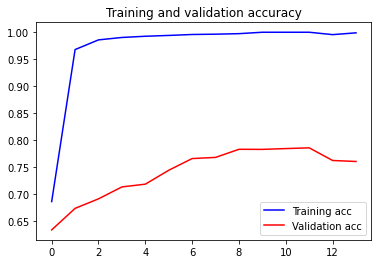

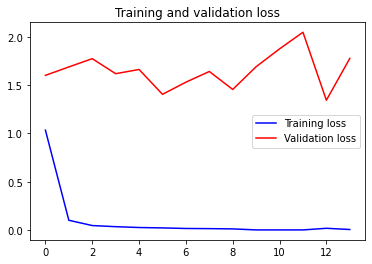

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

# Saving Model

In [ ]:
model.save('../asl_basic.h5')